#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
#reading the data
data= pd.read_csv('Advertising.csv',index_col=0)
data.head()
data.columns=['TV', 'radio', 'newspaper', 'sales']


In [7]:
data.head(9)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


In [9]:
data.shape

(200, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [3]:
data.TV.skew(),data.radio.skew(), data.newspaper.skew(), data.sales.skew()

(-0.06985336213274573,
 0.09417463149664404,
 0.8947204074986175,
 0.4075714250767127)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

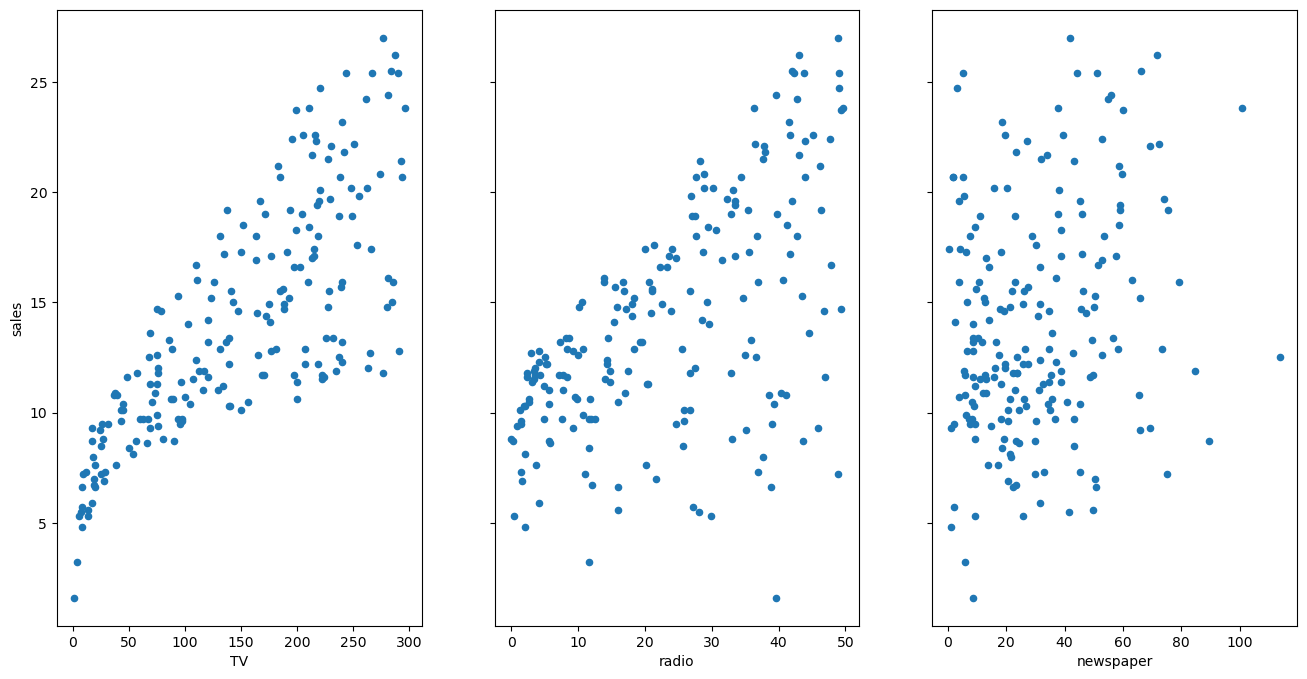

In [4]:
#visualisation of relationship between features and response using scatterplot

fig, axs= plt.subplots(1,3, sharey=True)
data.plot(kind= 'scatter', x='TV', y= 'sales', ax=axs[0], figsize=(16,8))
data.plot(kind= 'scatter', x='radio', y= 'sales', ax=axs[1])
data.plot(kind= 'scatter', x= 'newspaper', y= 'sales', ax= axs[2])

In [5]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### now analyzing data based on sales

In [5]:
X= data[['TV']]
Y= data['sales']

In [6]:
# importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [7]:
# creating object of the class
LR_model= LinearRegression()



In [12]:
LR_model.fit(X,Y)
# y_pred = w0 + w1*X

LinearRegression()

In [13]:
LR_model.intercept_, LR_model.coef_

# it means sales= 7.032 + (0.0475)* TV

(2.9388893694594085, array([ 0.04576465,  0.18853002, -0.00103749]))

### Trying multiple linear regression model

In [10]:
X= data[['TV', 'radio', 'newspaper']]
Y=data['sales']

In [11]:
# importing testing library

from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=183)

In [28]:
x_test

,TV,radio,newspaper
155,187.8,21.1,9.5
159,11.7,36.9,45.2
50,66.9,11.7,36.8
101,222.4,4.3,49.8
60,210.7,29.5,9.3
1,230.1,37.8,69.2
77,27.5,1.6,20.7
90,109.8,47.8,51.4
59,210.8,49.6,37.7
70,216.8,43.9,27.2


In [13]:
LR_model.fit(x_train, y_train)
LR_model.intercept_, LR_model.coef_

# it means Sales^= 3.1418+ 0.0439(TV)+0.1901(radio)+ 0.000963(newspaper)



(3.141827800668713, array([0.04395612, 0.19012789, 0.00096319]))

### checking performance of data based on Train data means past data and test data means future data

In [14]:
y_train_predct= LR_model.predict(x_train)
y_test_predct = LR_model.predict(x_test)


mean_absolute_error(y_train, y_train_predct), mean_absolute_error(y_test, y_test_predct)

mean_absolute_percentage_error(y_train, y_train_predct),mean_absolute_percentage_error(y_test, y_test_predct)

(0.10839081131084986, 0.2644129110927668)

## Statical Approach for R2 and Adjusted R2 OLS method


In [15]:
from statsmodels.formula.api import ols

In [16]:
lm1= ols(formula= 'sales ~ TV ', data= data).fit()

train_preds= lm1.predict(x_train)
test_preds= lm1.predict(x_test)

In [17]:
print('R2 value :', lm1.rsquared)
print('adj R2 value:', lm1.rsquared_adj)

R2 value : 0.611875050850071
adj R2 value: 0.6099148238341623


In [26]:
lm2= ols(formula= 'sales~ TV + radio', data= data).fit()

train_preds= lm2.predict(x_train)
test_preds= lm2.predict(x_test)

In [27]:
print('R2 value:', lm2.rsquared)
print('adj R2 value :', lm2.rsquared_adj)

R2 value: 0.8971942610828957
adj R2 value : 0.8961505479974429


In [32]:
lm3= ols(formula= 'sales~ TV+ radio+ newspaper', data= data).fit()

# train_preds= lm3.predict(x_train)
# test_preds= lm3.predict(x_test)

In [33]:
print('R2 value :', lm3.rsquared)
print('adj R2 value: ', lm3.rsquared_adj)

R2 value : 0.8972106381789522
adj R2 value:  0.8956373316204668


In [35]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_train, y_train_predct)

0.9069696655093666

In [20]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        23:53:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from sklearn.linear_model import Ridge, Lasso

In [24]:
Lasso(alpha= 10)

Lasso(alpha=10)

In [25]:
LR_model1= LinearRegression()

In [31]:
Lasso_reg = Lasso(alpha= 2)
Lasso_reg.fit(x_train,y_train)

print('Lasso Model Intercept and Coefficient', Lasso_reg.intercept_, Lasso_reg.coef_)
# prediction on Test data

train_pred= Lasso_reg.predict(x_train)
print(' RMSE on Train =', sqrt(mean_squared_error(y_train, train_pred)))


test_pred= Lasso_reg.predict(x_test)
print('RMSE on Test =', sqrt(mean_squared_error(y_test, test_pred)))

print('MAE on Test =', sqrt(mean_absolute_error(y_test, test_pred)))

Lasso Model Intercept and Coefficient 3.4056588662375713 [0.04371974 0.18106099 0.        ]
 RMSE on Train = 1.4927750864827116
RMSE on Test = 2.2861802262966284
MAE on Test = 1.2514325037079006


In [32]:
Ridge_reg = Ridge(alpha= 2)
Ridge_reg.fit(x_train, y_train)

print('Coefficient = ', Ridge_reg.coef_)

train_predict= Ridge_reg.predict(x_train)
print('RMSE on train =', sqrt(mean_squared_error(y_train, train_predict)))

test_predict= Ridge_reg.predict(x_test)
print('RMSE on test =', sqrt(mean_squared_error(y_test, test_predict)))

Coefficient =  [0.04395602 0.19011481 0.00096663]
RMSE on train = 1.4860911025724886
RMSE on test = 2.285385648937447


In [36]:
from sklearn.model_selection import GridSearchCV

ridge= Ridge()
parameter = {'alpha': [10,20,30,50,70,100,120,150,200]}

ridge_reggs= GridSearchCV(ridge, parameter, cv=5)
ridge_reggs.fit(x_train, y_train)
print('Best Parameter =', ridge_reggs.best_params_)
print('Best Score =', ridge_reggs.best_score_)

Best Parameter = {'alpha': 10}
Best Score = 0.8914758755893171


In [37]:
from sklearn.model_selection import GridSearchCV

lasso= Lasso()
parameter = {'alpha': [10,20,30,50,70,100,120,150,200]}

lasso_reggs= GridSearchCV(lasso, parameter, cv=5)
lasso_reggs.fit(x_train, y_train)
print('Best Parameter =', lasso_reggs.best_params_)
print('Best Score =', lasso_reggs.best_score_)

Best Parameter = {'alpha': 10}
Best Score = 0.8683840196712078


In [38]:
lasso_reggs

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [10, 20, 30, 50, 70, 100, 120, 150, 200]})